## Sentiment Analysis of British Airways Customer Reviews

### Summary:
This project involves scraping, cleaning, and analyzing customer reviews of British Airways from Skytrax. Using Python libraries like BeautifulSoup, TextBlob, and gensim, the analysis aims to uncover key themes and sentiment trends from 1,000 customer reviews. After web scraping, the reviews were cleaned to remove extraneous information and preprocessed for analysis. Key topics and customer concerns were identified, while sentiment analysis classified reviews as positive, negative, or neutral. 

The insights, including top words, sentiment distribution, and key discussion points, were visualized through word clouds and bar charts, highlighting areas of customer satisfaction and dissatisfaction.



In [22]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import string

In [23]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [24]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,✅ Trip Verified | Singapore to Heathrow with...
1,✅ Trip Verified | I recently travelled from ...
2,Not Verified | I paid for seats 80 A and B on...
3,"Not Verified | The flight wasn’t that bad, alt..."
4,✅ Trip Verified | I decided to treat myself a...


In [25]:
df.to_csv("BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [26]:
df.head()

,reviews
0,✅ Trip Verified | Singapore to Heathrow with...
1,✅ Trip Verified | I recently travelled from ...
2,Not Verified | I paid for seats 80 A and B on...
3,"Not Verified | The flight wasn’t that bad, alt..."
4,✅ Trip Verified | I decided to treat myself a...


In [27]:
# Remove "✅ Trip Verified" and "Not Verified" from each review
df['reviews'] = df['reviews'].str.replace(r'✅ Trip Verified \| |Not Verified \| ', '', regex=True)

# Convert all text to lowercase for consistency
df['reviews'] = df['reviews'].str.lower()

# Remove any leading or trailing whitespace
df['reviews'] = df['reviews'].str.strip()

# Display the cleaned data
df.head()


,reviews
0,✅ trip verified | singapore to heathrow with...
1,i recently travelled from munich to london wit...
2,i paid for seats 80 a and b on my flight from ...
3,"the flight wasn’t that bad, although the infli..."
4,i decided to treat myself and my teenage daugh...


In [31]:
# Create a translation table for punctuation
translator = str.maketrans('', '', string.punctuation)

# Apply the translation to remove punctuation
df['reviews'] = df['reviews'].str.translate(translator)


In [32]:
# Word count for each review
df['word_count'] = df['reviews'].apply(lambda x: len(x.split()))

# Character count for each review
df['char_count'] = df['reviews'].apply(len)

# Display basic stats
print(df[['word_count', 'char_count']].describe())


        word_count   char_count
count  1000.000000  1000.000000
mean    153.819000   830.547000
std     110.983519   590.345246
min      23.000000   125.000000
25%      75.000000   417.000000
50%     123.000000   670.000000
75%     196.000000  1040.500000
max     654.000000  3432.000000


In [33]:
from collections import Counter
from nltk.corpus import stopwords
import nltk
#nltk.download('stopwords')

# Define English stop words
stop_words = set(stopwords.words('english'))

# Combine all reviews into one big text
all_words = ' '.join(df['reviews']).lower().split()

# Remove stop words
filtered_words = [word for word in all_words if word not in stop_words]

# Find the most common words
word_counts = Counter(filtered_words)
word_count_list = word_counts.most_common(20)

df_word_counts = pd.DataFrame(word_count_list,columns=['Word','Count'])
print(df_word_counts)

        Word  Count
0     flight   1983
1         ba   1272
2    service    733
3       time    539
4     london    474
5    british    450
6       crew    448
7         us    439
8       seat    439
9    airways    432
10      food    431
11     class    431
12       one    424
13      good    416
14  business    405
15       get    395
16     would    393
17     staff    393
18     seats    386
19     hours    367


In [34]:
from nltk import ngrams
from collections import Counter

# Find common bigrams and trigrams
bigrams = Counter(ngrams(filtered_words, 2)).most_common(10)
trigrams = Counter(ngrams(filtered_words, 3)).most_common(10)

print("Most Common Bigrams:", bigrams)
print("Most Common Trigrams:", trigrams)

Most Common Bigrams: [(('british', 'airways'), 419), (('business', 'class'), 307), (('customer', 'service'), 219), (('cabin', 'crew'), 171), (('return', 'flight'), 86), (('connecting', 'flight'), 85), (('london', 'heathrow'), 77), (('flight', 'cancelled'), 68), (('club', 'world'), 64), (('premium', 'economy'), 62)]
Most Common Trigrams: [(('✅', 'trip', 'verified'), 22), (('business', 'class', 'seats'), 19), (('missed', 'connecting', 'flight'), 18), (('fly', 'british', 'airways'), 18), (('ba', 'customer', 'service'), 16), (('business', 'class', 'passengers'), 16), (('ba', 'business', 'class'), 14), (('flight', 'british', 'airways'), 14), (('experience', 'british', 'airways'), 13), (('world', 'traveller', 'plus'), 12)]


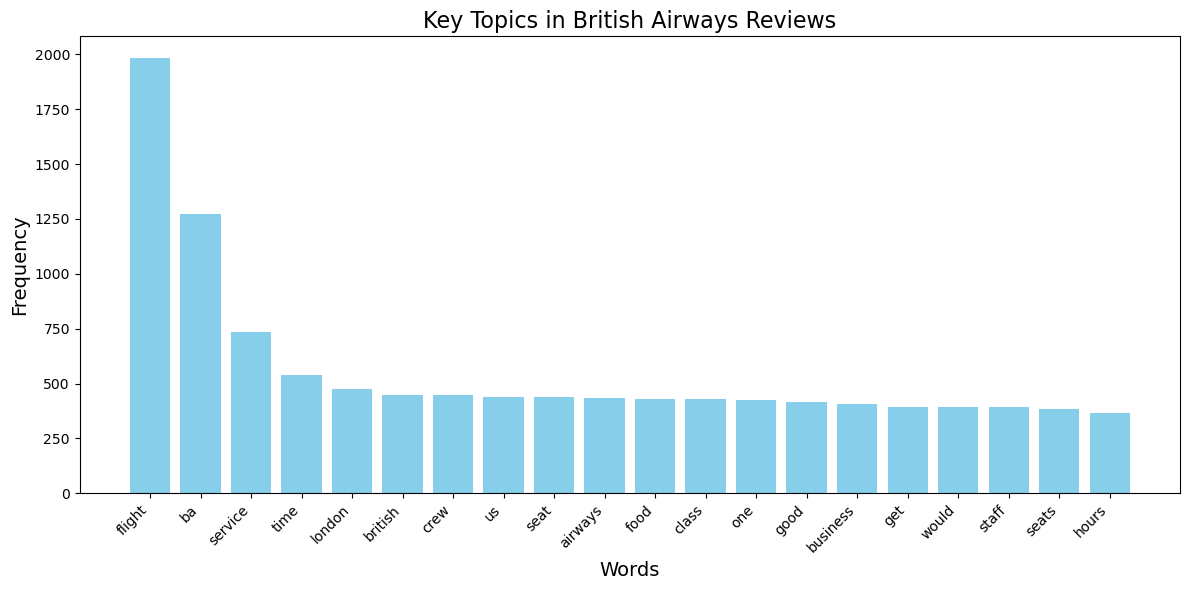

In [35]:

# Set the size of the plot
plt.figure(figsize=(12, 6))

# Create a bar plot
plt.bar(df_word_counts['Word'], df_word_counts['Count'], color='skyblue')

# Add title and labels
plt.title('Key Topics in British Airways Reviews', fontsize=16)
plt.xlabel('Words', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right')

# Display the bar graph
plt.tight_layout()  # Adjust layout to make room for rotated labels
plt.show()


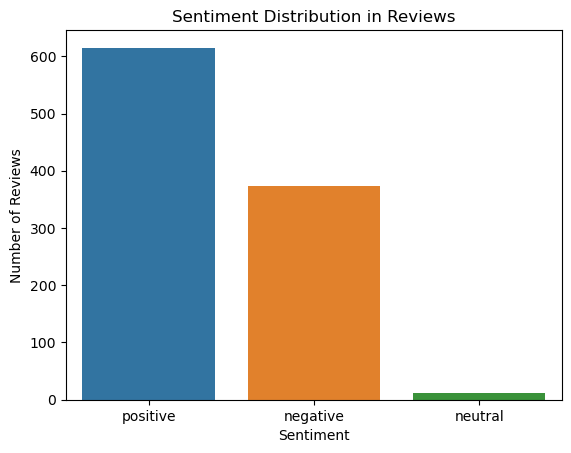

In [37]:
from textblob import TextBlob

# Calculate sentiment polarity for each review
df['sentiment'] = df['reviews'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Classify sentiment as positive, negative, or neutral
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'positive' if x > 0 else ('negative' if x < 0 else 'neutral'))

# Plot sentiment distribution
sns.countplot(data=df, x='sentiment_label')
plt.title("Sentiment Distribution in Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()


In [38]:
# Count the number of reviews for each sentiment category
sentiment_counts = df['sentiment_label'].value_counts()

# Total number of reviews
total_reviews = len(df)

# Calculate percentages
positive_percentage = (sentiment_counts.get('positive', 0) / total_reviews) * 100
negative_percentage = (sentiment_counts.get('negative', 0) / total_reviews) * 100
neutral_percentage = (sentiment_counts.get('neutral', 0) / total_reviews) * 100

# Print results
print(f"Out of {total_reviews} reviews:")
print(f"{positive_percentage:.1f}% positive")
print(f"{negative_percentage:.1f}% negative")
print(f"{neutral_percentage:.1f}% neutral")


Out of 1000 reviews:
61.5% positive
37.3% negative
1.2% neutral


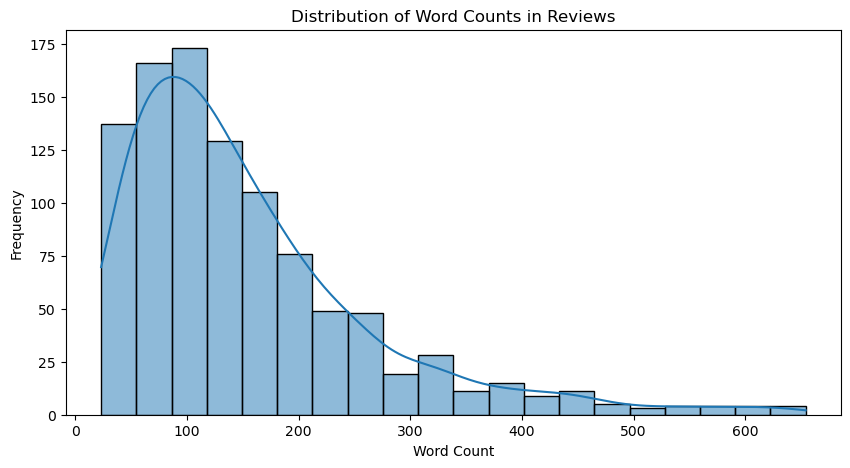

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(df['word_count'], bins=20, kde=True)
plt.title('Distribution of Word Counts in Reviews')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.show()


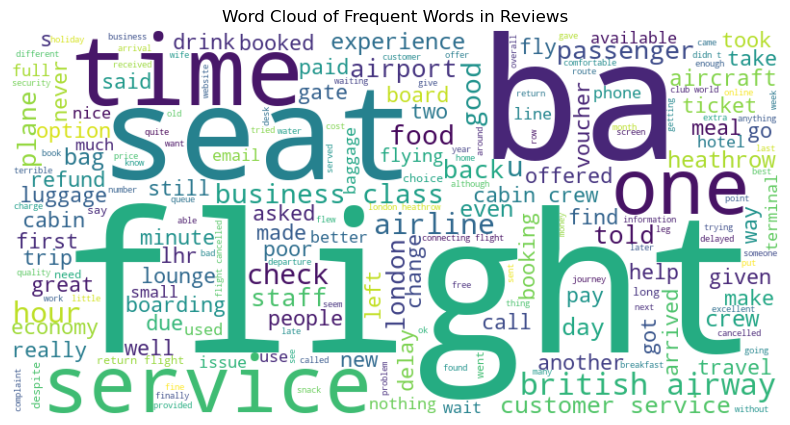

In [12]:
from wordcloud import WordCloud

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Frequent Words in Reviews")
plt.show()
